In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#Problem:
#

#import data

cbb_data = pd.read_csv('/Users/viren1/Documents/College/Python Programming/Datasets/cbb.csv')


#Check shap of data

#1757 samples (rows) 
#24 features (columns)


cbb_data.shape

cbb_data.dropna()



In [2]:
#check type of data in each row


cbb_data.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1757 entries, 0 to 1756
Data columns (total 24 columns):
TEAM          1757 non-null object
CONF          1757 non-null object
G             1757 non-null int64
W             1757 non-null int64
ADJOE         1757 non-null float64
ADJDE         1757 non-null float64
BARTHAG       1757 non-null float64
EFG_O         1757 non-null float64
EFG_D         1757 non-null float64
TOR           1757 non-null float64
TORD          1757 non-null float64
ORB           1757 non-null float64
DRB           1757 non-null float64
FTR           1757 non-null float64
FTRD          1757 non-null float64
2P_O          1757 non-null float64
2P_D          1757 non-null float64
3P_O          1757 non-null float64
3P_D          1757 non-null float64
ADJ_T         1757 non-null float64
WAB           1757 non-null float64
POSTSEASON    340 non-null object
SEED          340 non-null float64
YEAR          1757 non-null int64
dtypes: float64(18), int64(3), object(3)

In [3]:
#take a look at the head of the data

pd.set_option('display.max_columns', 24)

cbb_data.head()

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,DRB,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR
0,North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,18.2,40.7,30.0,32.3,30.4,53.9,44.6,32.7,36.2,71.7,8.6,2ND,1.0,2016
1,Wisconsin,B10,40,36,129.1,93.6,0.9758,54.8,47.7,12.4,15.8,32.1,23.7,36.2,22.4,54.8,44.7,36.5,37.5,59.3,11.3,2ND,1.0,2015
2,Michigan,B10,40,33,114.4,90.4,0.9375,53.9,47.7,14.0,19.5,25.5,24.9,30.7,30.0,54.7,46.8,35.2,33.2,65.9,6.9,2ND,3.0,2018
3,Texas Tech,B12,38,31,115.2,85.2,0.9696,53.5,43.0,17.7,22.8,27.4,28.7,32.9,36.6,52.8,41.9,36.5,29.7,67.5,7.0,2ND,3.0,2019
4,Gonzaga,WCC,39,37,117.8,86.3,0.9728,56.6,41.1,16.2,17.1,30.0,26.2,39.0,26.9,56.3,40.0,38.2,29.0,71.5,7.7,2ND,1.0,2017


In [4]:
#Take a look at the tail of the data

cbb_data.tail()


#Notice the difference in POSTSEASON feature from head to tail

#starts out with 2nd and lower teams have S16 
#this feature explains the farthest round the team made it to in the post season

#2nd refers to teams which lost in the championship game of the NCAA Tournament
#S16 refers to 'Sweet 16' round of the tournament

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,DRB,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR
1752,Texas A&M,SEC,35,22,111.2,94.7,0.8640,51.4,46.9,19.2,15.3,33.9,27.3,32.0,27.6,52.5,45.7,32.9,32.6,70.3,1.9,S16,7.0,2018
1753,LSU,SEC,35,28,117.9,96.6,0.9081,51.2,49.9,17.9,20.1,36.7,30.8,37.1,33.1,52.9,49.4,31.9,33.7,71.2,7.3,S16,3.0,2019
1754,Tennessee,SEC,36,31,122.8,95.2,0.9488,55.3,48.1,15.8,18.0,31.6,30.2,33.3,34.9,55.4,44.7,36.7,35.4,68.8,9.9,S16,2.0,2019
1755,Gonzaga,WCC,35,27,117.4,94.5,0.9238,55.2,44.8,17.1,15.1,32.1,26.0,34.4,28.1,54.3,44.4,37.8,30.3,68.2,2.1,S16,11.0,2016
1756,Gonzaga,WCC,37,32,117.2,94.9,0.9192,57.0,47.1,16.1,17.4,33.0,23.1,32.1,29.1,58.2,44.1,36.8,35.0,70.5,4.9,S16,4.0,2018


In [5]:
#Lets take a look at the summary statistics


cbb_data.describe()


#No extreme ranges in the data


#Ranges to take note of:

# WAB (WINS ABOVE BUBBLE) -> (min: -25.2, max: -13.1)
#This stat measures the difference in wins a team has compared to an expected bubble team against a similar schedule





,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,DRB,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,SEED,YEAR
count,1757.000000,1757.000000,1757.000000,1757.000000,1757.000000,1757.000000,1757.000000,1757.000000,1757.000000,1757.000000,1757.000000,1757.000000,1757.000000,1757.000000,1757.000000,1757.000000,1757.000000,1757.000000,1757.000000,340.000000,1757.000000
mean,31.523051,16.513375,103.542402,103.542459,0.493398,50.120489,50.312806,18.591804,18.521286,29.277120,29.467445,35.097894,35.373307,49.135970,49.298065,34.563517,34.744792,68.422254,-7.837109,8.791176,2017.002277
std,2.602819,6.545571,7.304975,6.472676,0.255291,3.130430,2.859604,1.991637,2.108968,4.101782,3.061786,4.884599,5.900935,3.422136,3.288265,2.742323,2.369727,3.258920,6.988694,4.674090,1.415419
min,24.000000,0.000000,76.700000,84.000000,0.007700,39.400000,39.600000,12.400000,10.200000,15.000000,18.400000,21.600000,21.800000,37.700000,37.700000,25.200000,27.100000,57.200000,-25.200000,1.000000,2015.000000
25%,30.000000,12.000000,98.600000,98.900000,0.283700,48.100000,48.400000,17.200000,17.100000,26.600000,27.300000,31.700000,31.200000,46.900000,47.100000,32.600000,33.100000,66.400000,-13.000000,5.000000,2016.000000
50%,31.000000,16.000000,103.100000,103.800000,0.474000,50.000000,50.300000,18.500000,18.500000,29.400000,29.400000,34.900000,34.900000,49.000000,49.300000,34.600000,34.700000,68.500000,-8.400000,9.000000,2017.000000
75%,33.000000,21.000000,108.100000,108.000000,0.710600,52.100000,52.300000,19.800000,19.900000,31.900000,31.500000,38.300000,39.200000,51.400000,51.500000,36.400000,36.300000,70.400000,-3.100000,13.000000,2018.000000
max,40.000000,38.000000,129.100000,124.000000,0.984200,59.800000,59.500000,26.100000,28.000000,42.100000,40.400000,51.000000,58.500000,62.600000,61.200000,44.100000,43.100000,83.400000,13.100000,16.000000,2019.000000


In [6]:
#Feature Exploration


cbb_data.columns


#Features:

#TEAM
#CONF - Conference
#G - Games
#W - Wins*
#ADJOE - Adjusted offensive efficiency
#ADJDE - Adjusted defensive efficiency
#BARTHAG - estimate of a teams winning probability against a Division 1 team
#EFG_O - Offensive Effective field goal percentage 
#EFG_D - defensive effective field goal percentage
#TOR - Turnovers
#TORD - Turnovers caused on the defensive end
#ORB - offensive rebounds
#DRB - defensive rebounds
#FTR - Free Throw rate (ratio of free throws to field goals attempted)
#FTRD - Free Throw rate defensive end (ratio of free throws to field goals allowed)
#2P_O - 2 pointers made by the team
#2P_D - 2 pointers allowed by the team while on defense
#3P_O - 3 pointers made by the team
#3P_D - 3 pointers made by the team while on defense
#ADJ_T - adjusted tempo
#WAB - Wins above bubble (See above)
#SEED - what ranking the team had in the season
#YEAR - specific year of the team


# * target variable - Wins

Index(['TEAM', 'CONF', 'G', 'W', 'ADJOE', 'ADJDE', 'BARTHAG', 'EFG_O', 'EFG_D',
       'TOR', 'TORD', 'ORB', 'DRB', 'FTR', 'FTRD', '2P_O', '2P_D', '3P_O',
       '3P_D', 'ADJ_T', 'WAB', 'POSTSEASON', 'SEED', 'YEAR'],
      dtype='object')

In [7]:
#Feature selection

#Drop uneccessary features (BARTHAG, WAB, SEED, YEAR, ADJ_T, ADJOE, ADJDE)

cbb_data = cbb_data.drop(['BARTHAG', 'WAB', 'SEED', 'YEAR', 'ADJ_T', 'ADJOE', 'ADJDE','POSTSEASON'], axis=1)

print(cbb_data.info())

print()
print()

print(cbb_data.shape)


#7 columns dropped

#In new Dataset:

#16 features 
#1757 samples 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1757 entries, 0 to 1756
Data columns (total 16 columns):
TEAM     1757 non-null object
CONF     1757 non-null object
G        1757 non-null int64
W        1757 non-null int64
EFG_O    1757 non-null float64
EFG_D    1757 non-null float64
TOR      1757 non-null float64
TORD     1757 non-null float64
ORB      1757 non-null float64
DRB      1757 non-null float64
FTR      1757 non-null float64
FTRD     1757 non-null float64
2P_O     1757 non-null float64
2P_D     1757 non-null float64
3P_O     1757 non-null float64
3P_D     1757 non-null float64
dtypes: float64(12), int64(2), object(2)
memory usage: 219.8+ KB
None


(1757, 16)


In [8]:
#Features vs Target variable EDA


#Create a scatter plot function
def scatter_plot(feature, target):
    plt.figure(figsize=(20,8))
    plt.scatter(cbb_data[feature], cbb_data[target], c='black')
    plt.title("Wins vs " + "{}".format(feature))
    plt.xlabel("{}".format(feature))
    plt.ylabel("Number of Wins")
    plt.show
    
    
    #The following cells will contain a box plot and linear regression plot for each offensive statistic feature
    
    

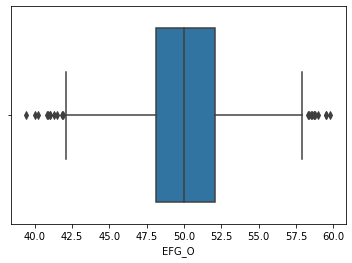

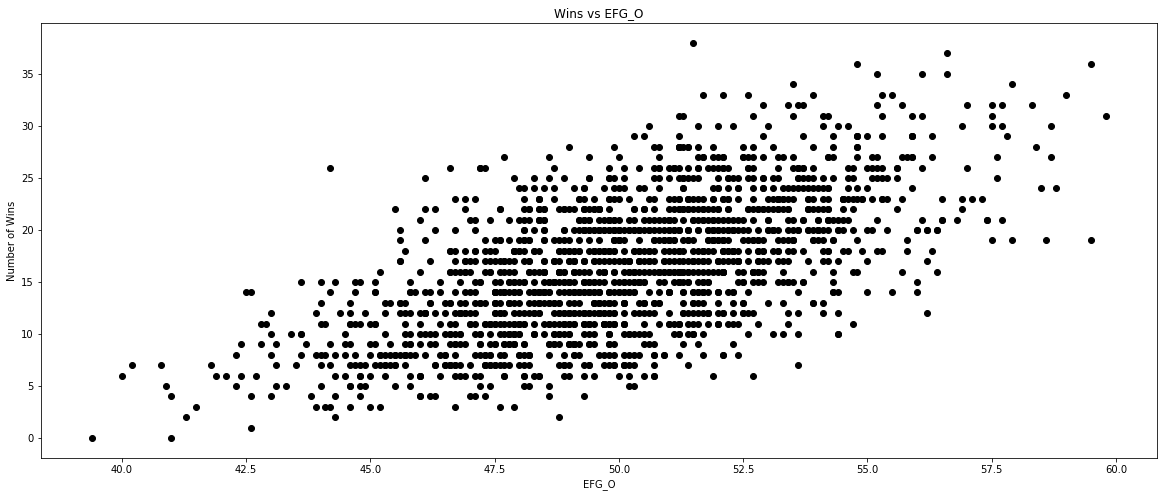

In [9]:
#EFG_O feature -> offensive effective field goal percentage

#Boxplots and scatter plots
sns.boxplot(x=cbb_data['EFG_O'])
scatter_plot('EFG_O', 'W')







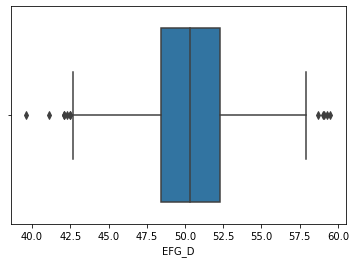

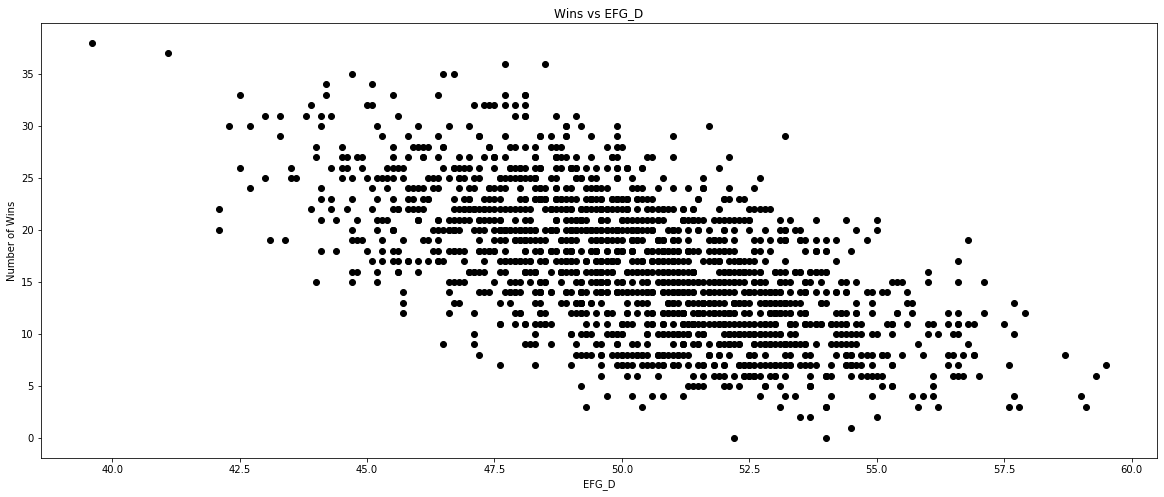

In [10]:
#EFG_D feature -> defensive effective field goal percentage

#Boxplots and scatter plots
sns.boxplot(x=cbb_data['EFG_D'])
scatter_plot('EFG_D', 'W')

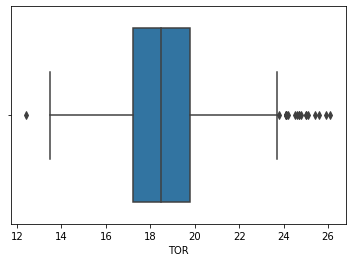

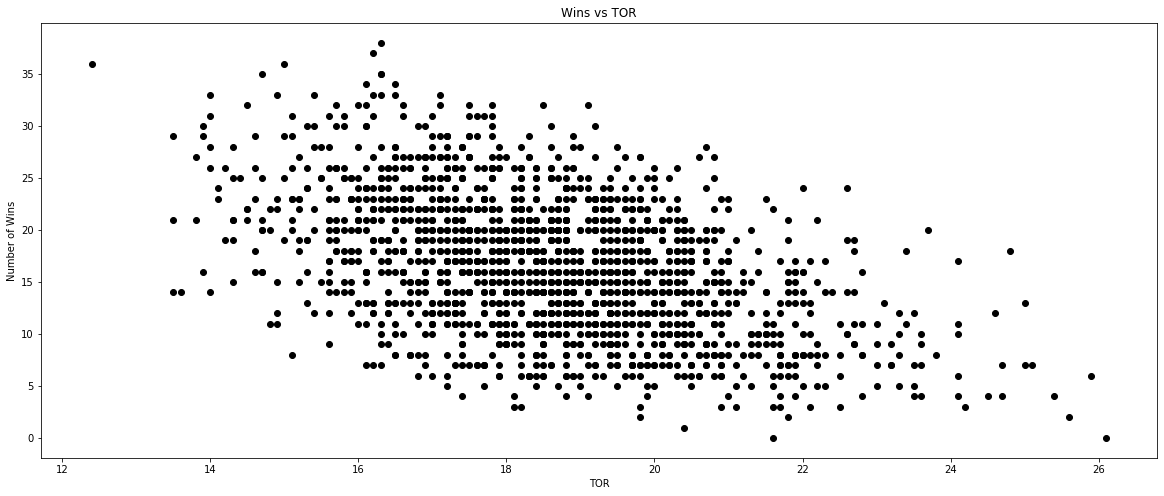

In [11]:
#TOR feature -> Turnovers

#Boxplots and scatter plots
sns.boxplot(x=cbb_data['TOR'])
scatter_plot('TOR', 'W')

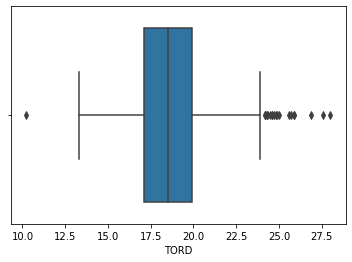

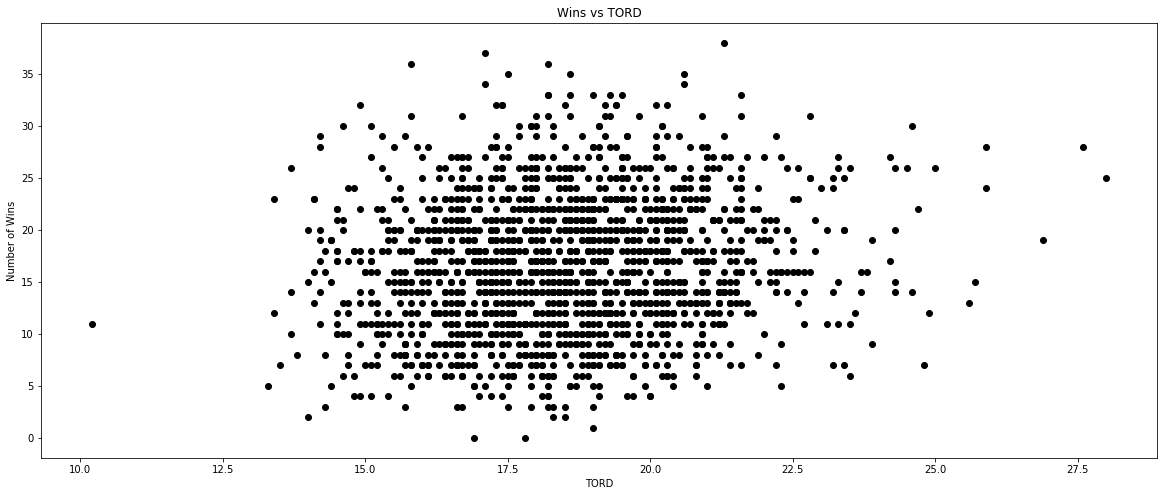

In [12]:
#TORD feature -> Turnovers created

#Boxplots and scatter plots
sns.boxplot(x=cbb_data['TORD'])
scatter_plot('TORD', 'W')

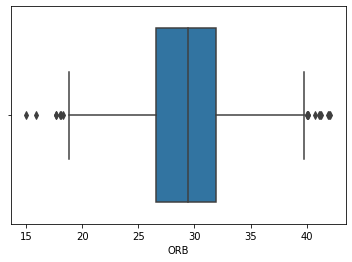

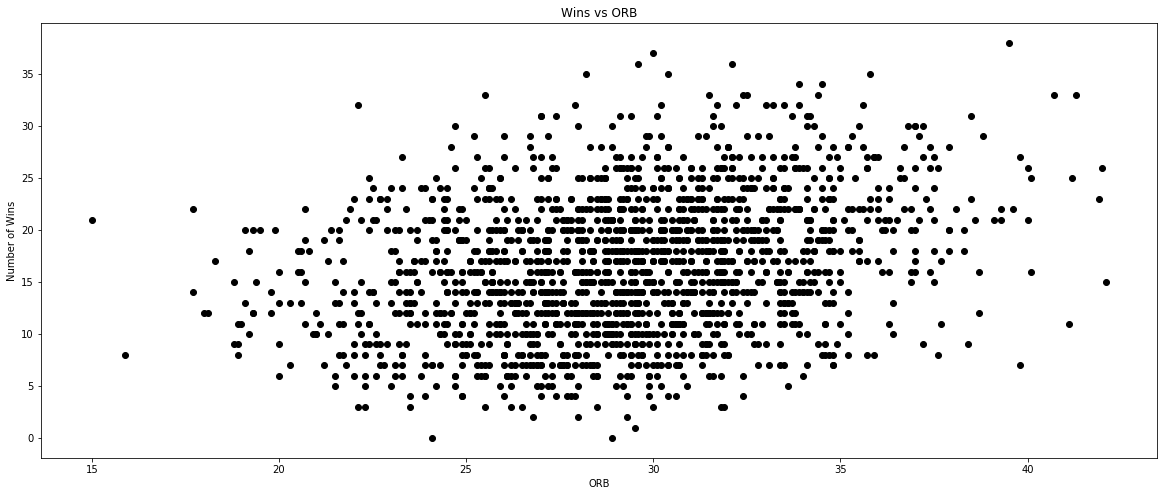

In [13]:
#ORB feature -> offensive rebounds

#Boxplots and scatter plots
sns.boxplot(x=cbb_data['ORB'])
scatter_plot('ORB', 'W')

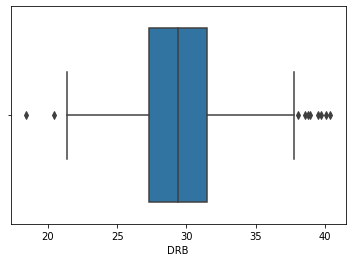

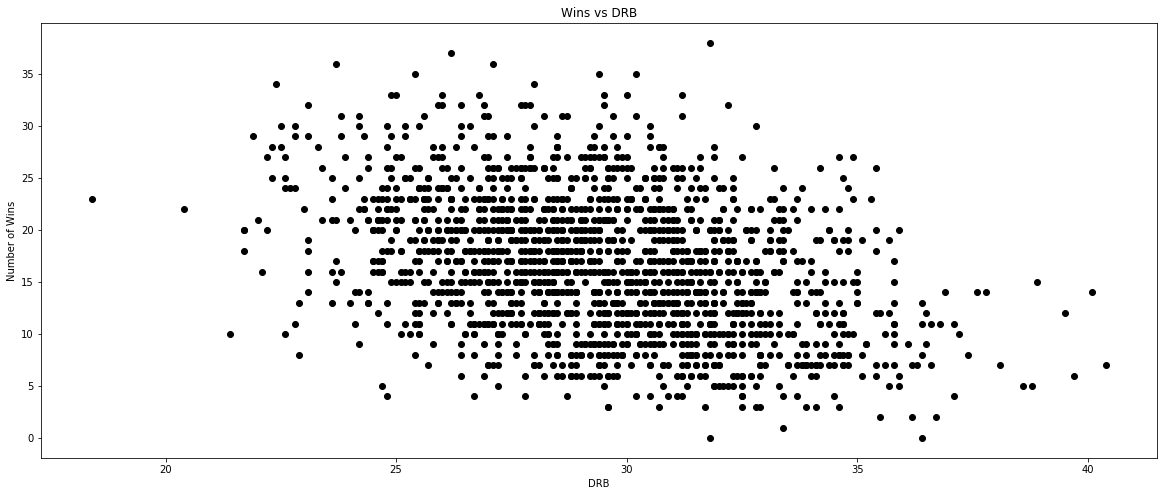

In [14]:
#DRB feature -> Defensive Rebounds

#Boxplots and scatter plots
sns.boxplot(x=cbb_data['DRB'])
scatter_plot('DRB', 'W')

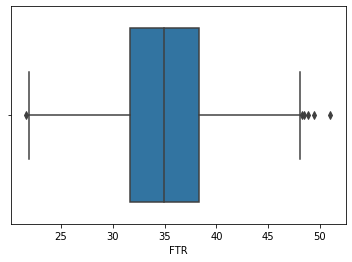

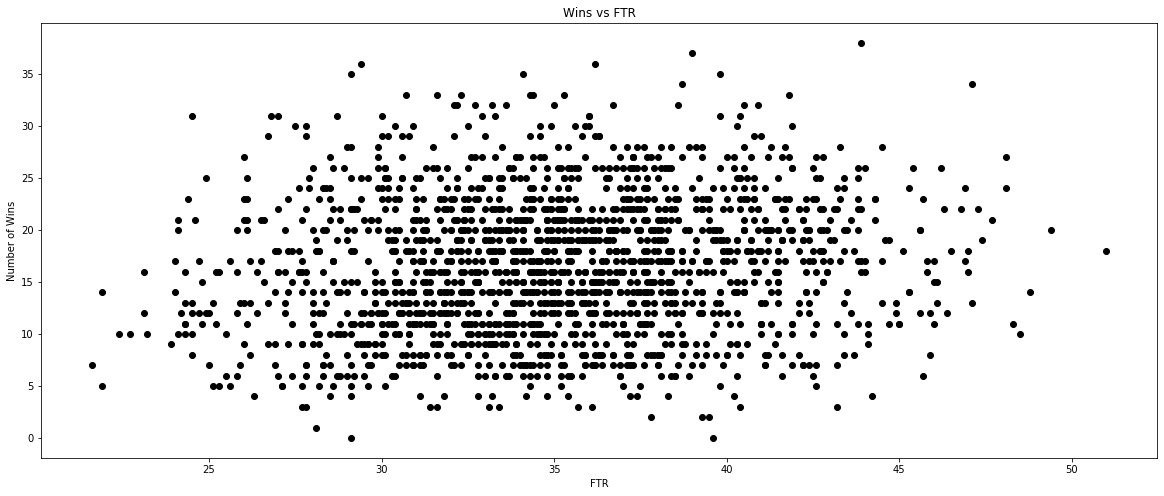

In [15]:
#FTR feature -> Free throw rating

#Boxplots and scatter plots
sns.boxplot(x=cbb_data['FTR'])
scatter_plot('FTR', 'W')

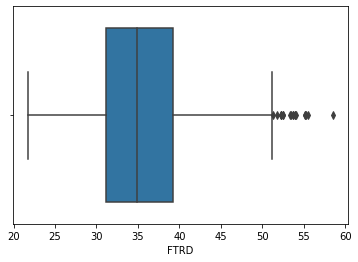

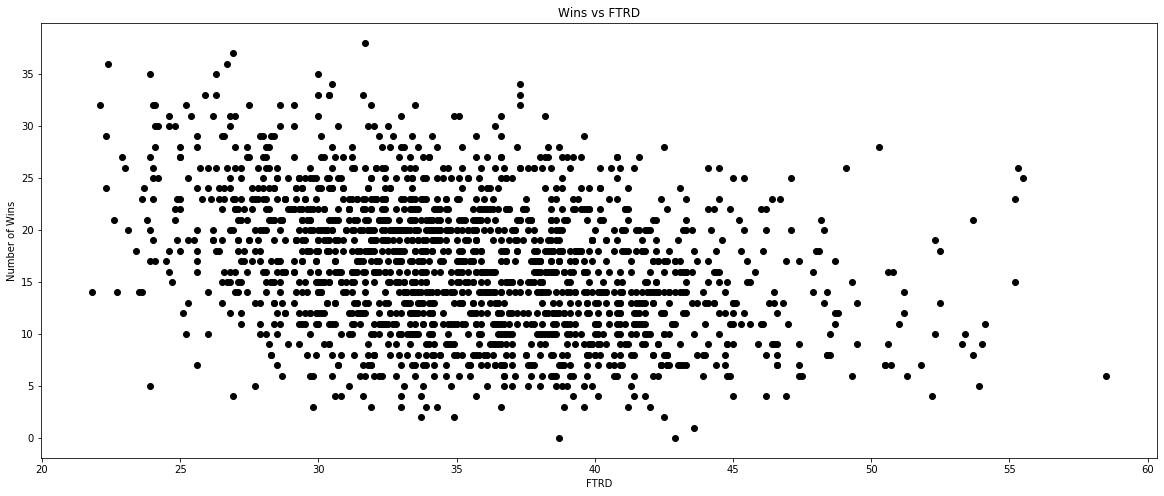

In [16]:
#FTRD feature -> Free throw rating (defensive)

#Boxplots and scatter plots
sns.boxplot(x=cbb_data['FTRD'])
scatter_plot('FTRD', 'W')

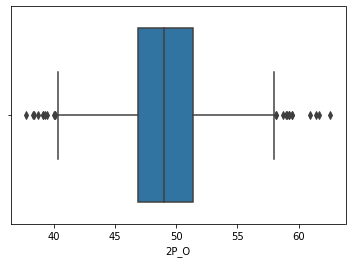

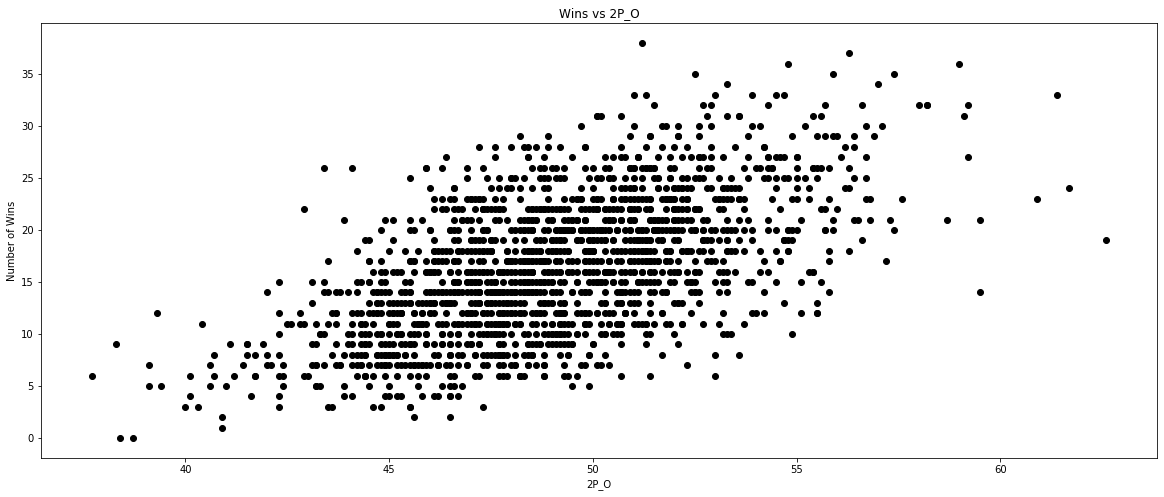

In [17]:
#2P_O feature -> 2 pointers offensive

#Boxplots and scatter plots
sns.boxplot(x=cbb_data['2P_O'])
scatter_plot('2P_O', 'W')



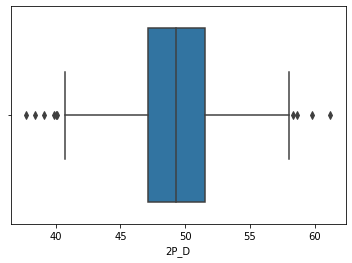

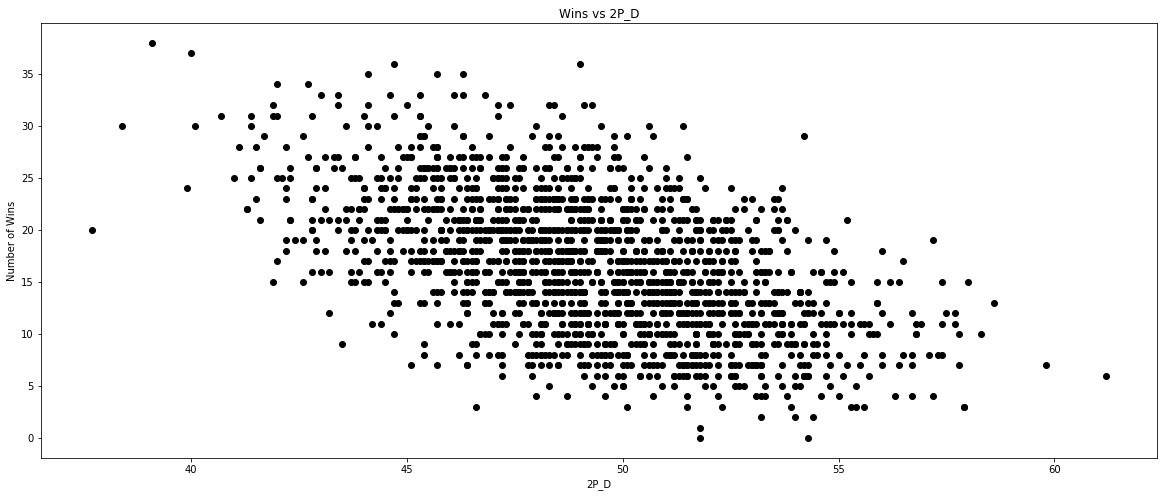

In [18]:
#2P_O feature -> 2 pointers allowed while defending

#Boxplots and scatter plots
sns.boxplot(x=cbb_data['2P_D'])
scatter_plot('2P_D', 'W')

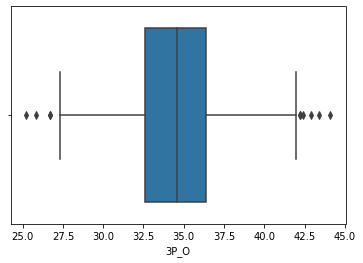

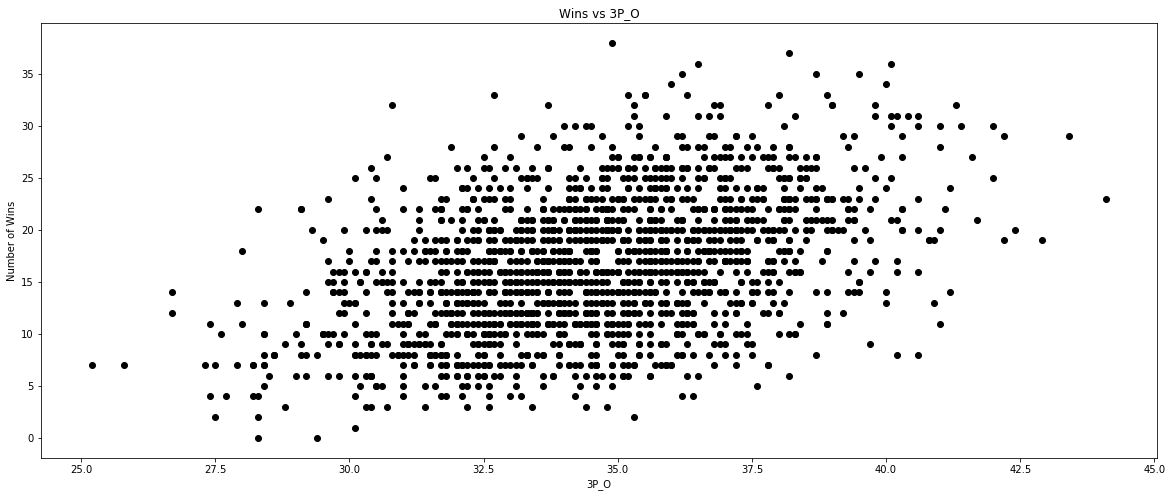

In [19]:
#3P_O feature -> 3 pointers offensive 

#Boxplots and scatter plots
sns.boxplot(x=cbb_data['3P_O'])
scatter_plot('3P_O', 'W')

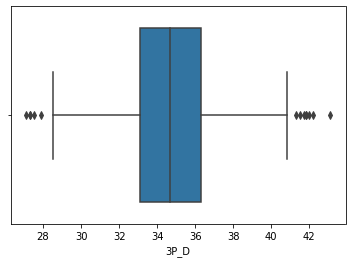

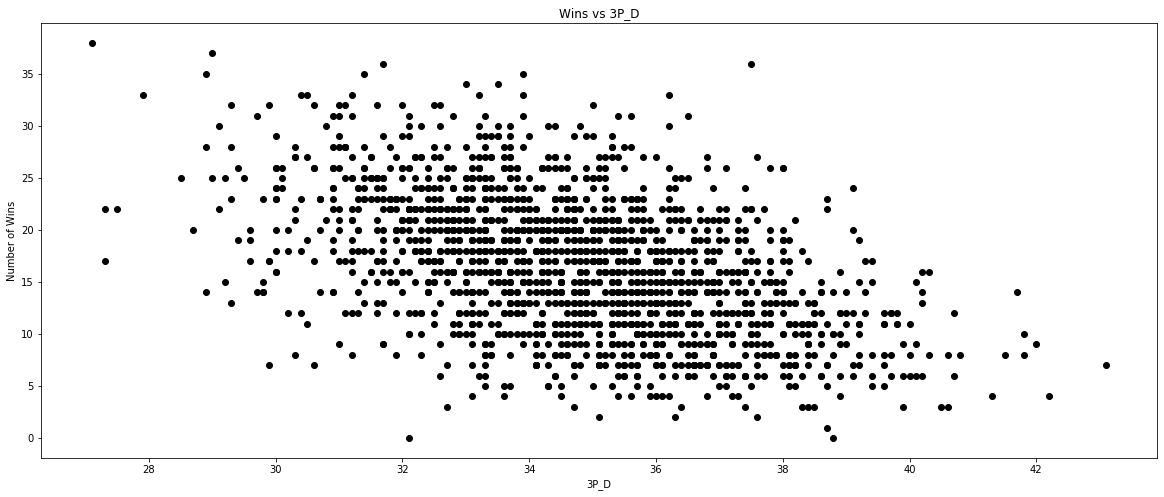

In [20]:
#3P_D feature -> 3 pointers while being defended

#Boxplots and scatter plots
sns.boxplot(x=cbb_data['3P_D'])
scatter_plot('3P_D', 'W')

In [21]:
#Summary:

#Features with a postive correlation with target variable Wins
    #EFG_O
    #2P_O
    #3P_O
 
    
    
#Feature with a negative Correlation with target variable wins
    #EFG_D
    #TOR
    #2P_D
    #3P_D
    
    
#Features with no real correlation with target variable wins
    #TORD
    #DRB
    #FTR
    #ORB
    #FTRD
    
    
#Features to be selected
    #X = EFG_O, 2P_O, 3P_O, EFG_D, TOR, 2P_D, 3P_D
    
    
#Features to be dropped
    #X_Dropped = TORD, DRB, FTR, ORB, FTRD
    


#Drop more features

cbb_data = cbb_data.drop(['TORD', 'DRB', 'FTR', 'ORB', 'FTRD'], axis=1)

print(cbb_data.info())

print()
print()

print(cbb_data.shape)



#Features reduced from 16 to 11

#1757 samples
#11 features  
#features to be used (7)
#features to be predicted (1)
#features left aside (3) -> TEAM, CONF, G

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1757 entries, 0 to 1756
Data columns (total 11 columns):
TEAM     1757 non-null object
CONF     1757 non-null object
G        1757 non-null int64
W        1757 non-null int64
EFG_O    1757 non-null float64
EFG_D    1757 non-null float64
TOR      1757 non-null float64
2P_O     1757 non-null float64
2P_D     1757 non-null float64
3P_O     1757 non-null float64
3P_D     1757 non-null float64
dtypes: float64(7), int64(2), object(2)
memory usage: 151.1+ KB
None


(1757, 11)


In [22]:
#Feature selection for ML model

#Create arrays

X = cbb_data.drop(['TEAM', 'CONF', 'G', 'W'], axis=1).values
y = cbb_data['W'].values

print(X.shape)
print(y.shape)

#shape of X feature array
#shape of y target array






(1757, 7)
(1757,)


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor




#Steps

#Impute Data 
#Scale Data
#split data
#train model
#fit data
#hyperparameter tuning


In [24]:

#Imputation

imp = SimpleImputer(missing_values=np.nan , strategy='mean')

imp.fit(X)

X = imp.transform(X)




In [25]:
#model selection

eNet = ElasticNet(l1_ratio=0.1)
lasso = Lasso(alpha=0.1)
ridge = Ridge(alpha=0.1)



 


In [26]:
#Pipeline instantiation

#Specify ElasticNet() steps for ElasticNet() model
eNetSteps = [('scaler', StandardScaler()),
              ('eNet', ElasticNet())]

#Specify Lasso() steps for Lasso() model
lassoSteps = [('scaler', StandardScaler()),
              ('lasso', Lasso())]

#Specify Ridge() steps for Ridge() model
ridgeSteps = [('scaler', StandardScaler()),
              ('ridge', Ridge())]





#Feed each successive steps into its own pipelone
eNetPipeline = Pipeline(eNetSteps)

lassoPipeline = Pipeline(lassoSteps)

ridgePipeline = Pipeline(ridgeSteps)



In [27]:
#Split data + fit 

#Split into train and test sets with 10% for training

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

#Fit each succesive regression model pipeline to training data


eNetPipeline.fit(X_train, y_train)


lassoPipeline.fit(X_train, y_train)


ridgePipeline.fit(X_train, y_train)



Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('ridge',
                 Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                       max_iter=None, normalize=False, random_state=None,
                       solver='auto', tol=0.001))],
         verbose=False)

In [59]:
#Predict + Metrics ( before hyper parameter tuning)


#make predictions
y_eNet_pred = eNetPipeline.predict(X_test)


y_lasso_pred = lassoPipeline.predict(X_test)


y_ridge_pred = ridgePipeline.predict(X_test)





#Metrics: r2 and mean squared error


#calculating r2 values

eNet_r2 = r2_score(y_test, y_eNet_pred)

lasso_r2 = r2_score(y_test, y_lasso_pred)

ridge_r2 = r2_score(y_test, y_ridge_pred)


#MSE Values

eNet_MSE = mean_squared_error(y_test, y_eNet_pred)

lasso_MSE = mean_squared_error(y_test, y_lasso_pred)

ridge_MSE = mean_squared_error(y_test, y_ridge_pred)


#MAE Values

eNet_MAE = mean_absolute_error(y_test, y_eNet_pred)

lasso_MAE = mean_absolute_error(y_test, y_lasso_pred)

ridge_MAE = mean_absolute_error(y_test, y_ridge_pred)




#printing metrics


print("Elastic Net Regressor r2 value (before tuning and cross validation): {}".format(eNet_r2))
print("Elastic Net Regressor MSE value (before tuning and cross validation): {}".format(eNet_MSE))
print("Elastic Net Regressor MAE value (before tuning and cross validation): {}".format(eNet_MAE))


print()
print()

print("Lasso Regressor r2 value (before tuning and cross validation): {}".format(lasso_r2))
print("Lasso Regressor MSE value (before tuning and cross validation): {}".format(lasso_MSE))
print("Lasso Regressor MAE value (before tuning and cross valdiation): {}".format(lasso_MAE))


print()
print()

print("Ridge Regressor r2 value (before tuning and cross validation): {}".format(ridge_r2))
print("Ridge Regressor MSE value (before tuning and cross validation): {}".format(ridge_MSE))
print("Ridge Regressor MAE value (before tuning and cross validation): {}".format(ridge_MAE))













Elastic Net Regressor r2 value (before tuning and cross validation): 0.7103627055068903
Elastic Net Regressor MSE value (before tuning and cross validation): 12.033113053031922
Elastic Net Regressor MAE value (before tuning and cross validation): 2.742532233189913


Lasso Regressor r2 value (before tuning and cross validation): 0.7108415616198536
Lasso Regressor MSE value (before tuning and cross validation): 12.01321875815699
Lasso Regressor MAE value (before tuning and cross valdiation): 2.7526566641756993


Ridge Regressor r2 value (before tuning and cross validation): 0.7509855504942827
Ridge Regressor MSE value (before tuning and cross validation): 10.345418493101164
Ridge Regressor MAE value (before tuning and cross validation): 2.5426128033674558


In [60]:
#Lets tune some hyperparameters to see what kind of improvement we get

In [61]:
#Hyperparameter tuning with RandomSearchCV



#Specify hyperparameter space for each regressor

#Hyperparameter space for ElasticNet Regressor -> parameter: l1_ratio
eNet_parameters = {'eNet__l1_ratio':[.1, .5, .7, .9, .95, .99, 1]}

#Hyperparameter space for Lasso Regressor -> parameter: alpha
lasso_parameters = {'lasso__alpha':[.1, .5, .7, .9, .95, .99, 1]}

#Hyperparameter space for Ridge Regressor -> parameter: alpha
ridge_parameters = {'ridge__alpha':[0.01, 0.05, 0.08, 0.1, 0.2, 0.5, 1]}



#Instantiate RandomizedSearchCV for each Regressor

#RandomizedSearchCV for ElasticNet 
eNet_cv = RandomizedSearchCV(eNetPipeline, eNet_parameters, cv=5)

#RandomizedSearchCV for Lasso
lasso_cv = RandomizedSearchCV(lassoPipeline, lasso_parameters, cv=5)

#RandomizedSearchCV for Ridge
ridge_cv = RandomizedSearchCV(ridgePipeline, ridge_parameters, cv=5)





In [62]:
#fit and predict for each Regressor

#Fitting ElasticNet regressor
eNet_cv.fit(X_train, y_train)

#Fitting Lasso Regressor
lasso_cv.fit(X_train, y_train)

#Fitting Ridge Regressor
ridge_cv.fit(X_train, y_train)




#Predicting ElasticNet regressor (post hyperparameter tuning and cross validation)
y_eNet_CVPred = eNet_cv.predict(X_test)

#Prediciting Lasso regressor (post hyperparameter tuning and cross validation)
y_lasso_CVPred = lasso_cv.predict(X_test)

#Predicting Ridge regressor (post hyperparameter tuning and cross validation)
y_ridge_CVPred = ridge_cv.predict(X_test)





/Users/viren1/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:266: UserWarning: The total space of parameters 7 is smaller than n_iter=10. Running 7 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
/Users/viren1/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:266: UserWarning: The total space of parameters 7 is smaller than n_iter=10. Running 7 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
/Users/viren1/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:266: UserWarning: The total space of parameters 7 is smaller than n_iter=10. Running 7 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


In [64]:
#metrics (post hyperparameter tuning and cross validation)
 
    

    
#Calculating r2 values for each regressor
    
#Calculating r2 values for ElasticNet 
eNet_r2_CV = r2_score(y_test, y_eNet_CVPred)


#Calculating r2 values for Lasso
lasso_r2_CV = r2_score(y_test, y_lasso_CVPred)

#Calculating r2 values for Ridge
ridge_r2_CV = r2_score(y_test, y_ridge_CVPred)






#Calculating MSE values for each Regressor

#Calculating MSE value for ElasticNet
eNet_MSE_CV = mean_squared_error(y_test, y_eNet_CVPred)


#Calculating MSE value for Lasso
lasso_MSE_CV = mean_squared_error(y_test, y_lasso_CVPred)


#Calculating MSE Value for Ridge
ridge_MSE_CV = mean_squared_error(y_test, y_ridge_CVPred)



#Calculating MAE values for each Regressor

#Calculating MAE values for ElasticNet
eNet_MAE_CV = mean_absolute_error(y_test, y_eNet_CVPred)

#Calculating MAE values for Lasso
lasso_MAE_CV = mean_absolute_error(y_test, y_lasso_CVPred)

#Calculating MAE values for Ridge
ridge_MAE_CV = mean_absolute_error(y_test, y_ridge_CVPred)


print("Elastic Net r2 score (after tuning and cross validation): {}".format(eNet_r2_CV))
print("Elastic Net MSE score (after tuning and cross validation): {}".format(eNet_MSE_CV))
print("Elastic Net MAE score (after tuning and cross validation): {}".format(eNet_MAE_CV))
print("Tuned ElasticNet L1 ratio: {}".format(eNet_cv.best_params_))
print("Tuned ElasticNet best score: {}".format(eNet_cv.best_score_))


print()
print()

print("Lasso r2 score (after tuning and cross validation): {}".format(lasso_r2_CV))
print("Lasso MSE score (after tuning and cross validation): {}".format(lasso_MSE_CV))
print("Lasso MAE score (after tuning and cross validation): {}".format(lasso_MAE_CV))
print("Tuned Lasso alpha value: {}".format(lasso_cv.best_params_))
print("Tuned Lasso best score: {}".format(lasso_cv.best_score_))

print()
print()


print("Ridge r2 score (after tuning and cross validation): {}".format(ridge_r2_CV))
print("Ridge MSE score (after tuning and cross validation): {}".format(ridge_MSE_CV))
print("Ridge MAE score (after tuning and cross validation): {}".format(ridge_MAE_CV))
print("Tuned Ridge alpha value: {}".format(ridge_cv.best_params_))
print("Tuned Ridge best score: {}".format(ridge_cv.best_score_))



Elastic Net r2 score (after tuning and cross validation): 0.7129702604821143
Elastic Net MSE score (after tuning and cross validation): 11.924780996333977
Elastic Net MAE score (after tuning and cross validation): 2.7316482074257933
Tuned ElasticNet L1 ratio: {'eNet__l1_ratio': 0.1}
Tuned ElasticNet best score: 0.6696783461049362


Lasso r2 score (after tuning and cross validation): 0.7488879565581331
Lasso MSE score (after tuning and cross validation): 10.432563986630289
Lasso MAE score (after tuning and cross validation): 2.5520982432949175
Tuned Lasso alpha value: {'lasso__alpha': 0.1}
Tuned Lasso best score: 0.7222763316015718


Ridge r2 score (after tuning and cross validation): 0.7509855504942827
Ridge MSE score (after tuning and cross validation): 10.345418493101164
Ridge MAE score (after tuning and cross validation): 2.5426128033674558
Tuned Ridge alpha value: {'ridge__alpha': 1}
Tuned Ridge best score: 0.7237439303880825


In [33]:
#Accuracy has improved for each regressor (Lasso with the most improvement - 3%)

#however, we will tune more hyperparameters to see if accuracy increase
#Also by using RandomizedSearchCV

#We will also implement a new Regressor - RandomForestRegressor




In [34]:
#Instantiate steps for pipeline
randForest = RandomForestRegressor()

randForest_steps = [('scaler', StandardScaler()),
                       ('randForest', RandomForestRegressor())]

randForest_pipeline = Pipeline(randForest_steps)

randForest_pipeline.fit(X_train, y_train)

/Users/viren1/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('randForest',
                 RandomForestRegressor(bootstrap=True, criterion='mse',
                                       max_depth=None, max_features='auto',
                                       max_leaf_nodes=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=10, n_jobs=None,
                                       oob_score=False, random_state=None,
                                       verbose=0, warm_start=False))],
         verbose=False)

In [35]:

randForest_pred = randForest_pipeline.predict(X_test)

#Compute and print metrics for random forest regressor

#computing r2 value

randForest_r2 = r2_score(y_test, randForest_pred)


#computing MAE value

randForest_MAE = mean_absolute_error(y_test, randForest_pred)

#computing MSE value

randForest_MSE = mean_squared_error(y_test, randForest_pred)


print("R2 value for RandomForest Regressor: {}".format(randForest_r2))

print()
print()

print("Mean Absolute Error for RandomForest Regressor: {}".format(randForest_MAE))

print()
print()

print("Mean Squared Error for RandomForest Regressor: {}".format(randForest_MSE))

R2 value for RandomForest Regressor: 0.6803651531728665


Mean Absolute Error for RandomForest Regressor: 2.988068181818181


Mean Squared Error for RandomForest Regressor: 13.279375


In [36]:
#Lets look at each estimator to see what more parameters we can tune

#Checking parameters for ElasticNet()
eNet.get_params


#Parameters to tune:
    #alpha
    #copy_X
    #l1_ratio
    #normalize
    #positive
    #random_state
    #tol
    #max_iter
    #selection

<bound method BaseEstimator.get_params of ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.1,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)>

In [37]:
#Lasso

#Checking parameters for Lasso()
lasso.get_params


#Parameters to tune:
    #alpha
    #random_state
    #copy_X
    #normalize
    #positive
    #tol
    #max_iter
    #selection
    #fit_intercept


<bound method BaseEstimator.get_params of Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)>

In [38]:
#Ridge

#Checking parameters for Ridge()

ridge.get_params

#Parameters to tune:
    #alpha
    #copy_X
    #fit_intercept
    #max_iter
    #normalize
    #random_state
    #solver
    #tol
    

<bound method BaseEstimator.get_params of Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)>

In [39]:
#RandomForest

randForest.get_params

#Parameters to tune:
    #max_depth
    #min_samples_leaf
    #min_samples_split
    #n_estimators
    #random_state
    #n_jobs
    #verbose
    #max_features


<bound method BaseEstimator.get_params of RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators='warn',
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)>

In [40]:
#Specify new hyperparameter spaces

eNet_more_parameters = {'eNet__alpha':[.1, .5, .7, .9, 1, 2, 3, 10],
                               'eNet__l1_ratio':[.1, .5, .7, .9, .95, .99, 1],         
                                           'eNet__random_state':[1, 2, 5, 10, 21, 42, 50, 100],
                                               'eNet__tol':[.0001, .001, .005, .01, .05, .1, .15, .2, .3, .5, 1, 5, 10],
                                                           'eNet__selection':['cyclic', 'random']}

lasso_more_parameters = {'lasso__alpha':[.1, .5, .7, .9, .95, .99, 1, 2, 3, 10],
                            'lasso__random_state':[1, 2, 5, 10, 21, 42, 50, 100],
                                            'lasso__tol':[.0001, .001, .005, .01, .05, .1, .15, .2, .3, .5, 1, 5, 10],
                                                    'lasso__selection':['cyclic', 'random'],
                                                        'lasso__fit_intercept':[True, False]}

ridge_more_parameters = {'ridge__alpha':[0.01, 0.05, 0.08, 0.1, 0.2, 0.5, 1],
                                            'ridge__random_state':[1, 2, 5, 10, 21, 42, 50, 100],
                                                'ridge__solver':['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],
                                                    'ridge__tol':[.001, .005, .01, .05, .1, .15, .2, .3, .5, 1, 5, 10, 30]}

randForest_parameters = {'randForest__max_depth':[10, 20, 30, 40, 50, 80, 100],
                            'randForest__min_samples_leaf':[1, 2, 5, 10, 20, 50],
                                    'randForest__n_estimators':[100, 200, 400, 600, 800, 1000],
                                        'randForest__min_samples_split':[2, 5, 10, 15]}

In [41]:
#Instantiate another RandomizedSearchCV for the final parameter spaces
#5 fold Cross Validation
 


eNet_CV_Final = RandomizedSearchCV(eNetPipeline, eNet_more_parameters, cv=5)

lasso_CV_Final = RandomizedSearchCV(lassoPipeline, lasso_more_parameters, cv=5)

ridge_CV_Final = RandomizedSearchCV(ridgePipeline, ridge_more_parameters, cv=5)

randForest_CV_Final = RandomizedSearchCV(randForest_pipeline, randForest_parameters, cv=5)





In [42]:
#Fit ElasticNet Pipeline
eNet_CV_Final.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=Pipeline(memory=None,
                                      steps=[('scaler',
                                              StandardScaler(copy=True,
                                                             with_mean=True,
                                                             with_std=True)),
                                             ('eNet',
                                              ElasticNet(alpha=1.0, copy_X=True,
                                                         fit_intercept=True,
                                                         l1_ratio=0.5,
                                                         max_iter=1000,
                                                         normalize=False,
                                                         positive=False,
                                                         precompute=False,
                               

In [43]:
#Fit Lasso Pipeline
lasso_CV_Final.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=Pipeline(memory=None,
                                      steps=[('scaler',
                                              StandardScaler(copy=True,
                                                             with_mean=True,
                                                             with_std=True)),
                                             ('lasso',
                                              Lasso(alpha=1.0, copy_X=True,
                                                    fit_intercept=True,
                                                    max_iter=1000,
                                                    normalize=False,
                                                    positive=False,
                                                    precompute=False,
                                                    random_state=None,
                                                    selectio

In [44]:
#Fit Ridge Pipeline
ridge_CV_Final.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=Pipeline(memory=None,
                                      steps=[('scaler',
                                              StandardScaler(copy=True,
                                                             with_mean=True,
                                                             with_std=True)),
                                             ('ridge',
                                              Ridge(alpha=1.0, copy_X=True,
                                                    fit_intercept=True,
                                                    max_iter=None,
                                                    normalize=False,
                                                    random_state=None,
                                                    solver='auto',
                                                    tol=0.001))],
                                      verbose=False),
           

In [48]:
randForest_CV_Final.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=Pipeline(memory=None,
                                      steps=[('scaler',
                                              StandardScaler(copy=True,
                                                             with_mean=True,
                                                             with_std=True)),
                                             ('randForest',
                                              RandomForestRegressor(bootstrap=True,
                                                                    criterion='mse',
                                                                    max_depth=None,
                                                                    max_features='auto',
                                                                    max_leaf_nodes=None,
                                                                    min_impurity_decrease=0.0,
                      

In [49]:
#Now we will output the best parameters for each regressor and use them in the final testing

print("Best parameters for ElasticNet Regressor: ")
print("{}".format(eNet_CV_Final.best_params_))

print()
print()

print("Best parameters for Lasso Regressor: ")
print("{}".format(lasso_CV_Final.best_params_))

print()
print()


print("Best parameters for Ridge Regressor: ")
print("{}".format(ridge_CV_Final.best_params_))

print()
print()

print("Best parameters for RandomForest Regressor: ")
print("{}".format(randForest_CV_Final.best_params_))








Best parameters for ElasticNet Regressor: 
{'eNet__tol': 0.5, 'eNet__selection': 'random', 'eNet__random_state': 50, 'eNet__l1_ratio': 0.7, 'eNet__alpha': 0.1}


Best parameters for Lasso Regressor: 
{'lasso__tol': 0.005, 'lasso__selection': 'cyclic', 'lasso__random_state': 50, 'lasso__fit_intercept': True, 'lasso__alpha': 0.1}


Best parameters for Ridge Regressor: 
{'ridge__tol': 0.01, 'ridge__solver': 'lsqr', 'ridge__random_state': 1, 'ridge__alpha': 0.01}


Best parameters for RandomForest Regressor: 
{'randForest__n_estimators': 600, 'randForest__min_samples_split': 10, 'randForest__min_samples_leaf': 10, 'randForest__max_depth': 10}


In [50]:
#Instantiate new models for with the best parameters for each regressor



eNet_bestParams = ElasticNet(tol=0.5, selection='random', random_state=50, l1_ratio=0.7, alpha=0.1)

lasso_bestParams = Lasso(tol=0.005, selection='cyclic', random_state=50, fit_intercept=True, alpha=0.1)

ridge_bestParams = Ridge(tol=0.01, solver='lsqr', random_state=1, alpha=0.01)

randForest_bestParams = RandomForestRegressor(n_estimators=600, min_samples_split=10, min_samples_leaf=10, max_depth=10)




In [ ]:
#Fit and Predict the training data on the new models

In [54]:
#Fitting each regressor

#ElasticNet
eNet_bestParams.fit(X_train, y_train)





ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.7,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=50, selection='random', tol=0.5, warm_start=False)

In [52]:
#Lasso
lasso_bestParams.fit(X_train, y_train)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=50,
      selection='cyclic', tol=0.005, warm_start=False)

In [53]:
#Ridge
ridge_bestParams.fit(X_train, y_train)

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=1, solver='lsqr', tol=0.01)

In [55]:
#RandomForest
randForest_bestParams.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=10, min_samples_split=10,
                      min_weight_fraction_leaf=0.0, n_estimators=600,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [56]:
#Make final predictions


eNet_bestPred = eNet_bestParams.predict(X_test)

lasso_bestPred = lasso_bestParams.predict(X_test)

ridge_bestPred = ridge_bestParams.predict(X_test)

randForest_bestPred = randForest_bestParams.predict(X_test)




In [67]:
#Compute final metrics and print

#Computing r2 score for each regressor

eNet_r2_final = r2_score(y_test, eNet_bestPred)

lasso_r2_final = r2_score(y_test, lasso_bestPred)

ridge_r2_final = r2_score(y_test, ridge_bestPred)

randForest_r2_final = r2_score(y_test, randForest_bestPred)

#Computing MAE score for each regressor

eNet_MAE_final = mean_absolute_error(y_test, eNet_bestPred)

lasso_MAE_final = mean_absolute_error(y_test, lasso_bestPred)

ridge_MAE_final = mean_absolute_error(y_test, ridge_bestPred)

randForest_MAE_final = mean_absolute_error(y_test, randForest_bestPred)

#Computing MSE score for each regressor

eNet_MSE_final = mean_squared_error(y_test, eNet_bestPred)

lasso_MSE_final = mean_squared_error(y_test, lasso_bestPred)

ridge_MSE_final = mean_squared_error(y_test, ridge_bestPred)

randForest_MSE_final = mean_squared_error(y_test, randForest_bestPred)




In [68]:
#Print the final metrics


print("R2 score for final ElasticNet Regressor: {}".format(eNet_r2_final))
print()
print("Mean Absolute Error for final ElasticNet Regressor: {}".format(eNet_MAE_final))
print()
print("Mean Squared Error for final ElasticNet Regressor: {}".format(eNet_MSE_final))

print()
print()

print("R2 score for final Lasso Regressor: {}".format(lasso_r2_final))
print()
print("Mean Absolute Error for final Lasso Regressor: {}".format(lasso_MAE_final))
print()
print("Mean Squared Error for final Lasso Regressor: {}".format(lasso_MSE_final))

print()
print()

print("R2 score for final Ridge Regressor: {}".format(ridge_r2_final))
print()
print("Mean Absolute Error for final Ridge Regressor: {}".format(ridge_MAE_final))
print()
print("Mean Squared Error for final Ridge Regressor: {}".format(ridge_MSE_final))

print()
print()

print("R2 score for final RandomForest Regressor: {}".format(randForest_r2_final))
print()
print("Mean Absolute Error for final RandomForest Regressor: {}".format(randForest_MAE_final))
print()
print("Mean Squared Error for final RandomForest Regressor: {}".format(randForest_MSE_final))

R2 score for final ElasticNet Regressor: 0.720096862305005

Mean Absolute Error for final ElasticNet Regressor: 2.7430181159691203

Mean Squared Error for final ElasticNet Regressor: 11.62870308423752


R2 score for final Lasso Regressor: 0.7476978651338394

Mean Absolute Error for final Lasso Regressor: 2.5533547750193213

Mean Squared Error for final Lasso Regressor: 10.482006875803217


R2 score for final Ridge Regressor: 0.7497436023386668

Mean Absolute Error for final Ridge Regressor: 2.5466150032762243

Mean Squared Error for final Ridge Regressor: 10.397015793748118


R2 score for final RandomForest Regressor: 0.726856214779523

Mean Absolute Error for final RandomForest Regressor: 2.6914109127411687

Mean Squared Error for final RandomForest Regressor: 11.347882713250726


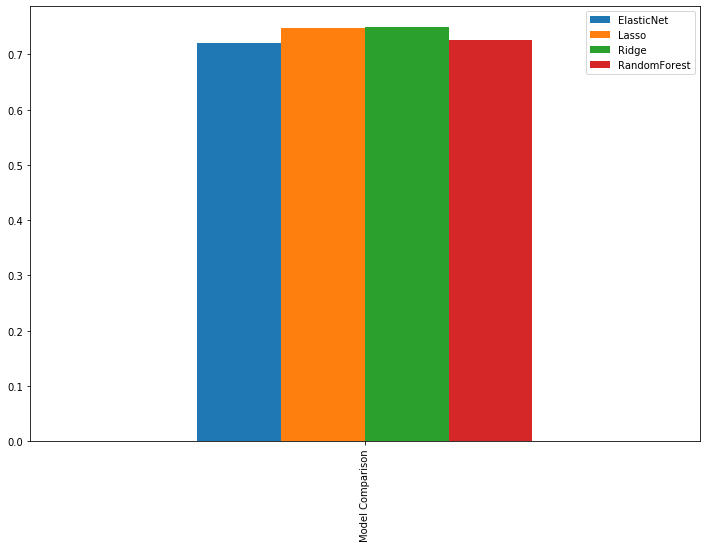

In [77]:

d = {'ElasticNet':eNet_r2_final, 
            'Lasso':lasso_r2_final, 
                'Ridge':ridge_r2_final, 
                'RandomForest':randForest_r2_final}

compare_metrics = pd.DataFrame(data=d, index=['Model Comparison'])

compare_metrics.plot.bar(figsize=(12,8))


#As we can see the ridge model was the best predictor for wins

In [79]:
#Lets see how ridge compared from its orginal values to predicted values

pd.set_option('display.max_rows', 176)

compared_values = pd.DataFrame({'Predictions':eNet_bestPred, 'Actual Wins':y_test})

compared_values

,Predictions,Actual Wins
0,20.462249,22
1,24.832231,20
2,23.770664,19
3,19.724653,23
4,4.460757,3
5,19.159840,15
6,18.386453,28
7,20.447558,20
8,11.095839,10
9,11.488156,19
